In [11]:
print(np_data[:200,:])
print(np_data[:200,[0,1,3,5,6,7,10,11,12,13,14,17,18,19,22,23,24]].shape)
np_data[:200,[5,7,10,14,17,19,22,24]])
np_data[:200,[4,10,17]])

[[36.9  21.8   1.7  ...  2.    0.32  2.4 ]
 [36.1  12.9   2.8  ...  2.    0.32  1.8 ]
 [25.3  13.7   1.8  ...  2.    0.32  1.3 ]
 ...
 [20.7  14.5   1.4  ...  4.    2.89  3.9 ]
 [35.2  12.7   2.8  ...  4.    2.89  3.8 ]
 [42.1  17.    2.5  ...  4.    2.89  4.4 ]]
(200, 17)


In [1]:
import sys
sys.path.append("/root/autodl-tmp/pykan-master")

from kan import *

device = torch.device('cpu')
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
# model = KAN(width=[17,8, [4,2],1], grid=10, k=3, seed=1, device=device)
model = KAN(width=[3,10, 10,1], grid=10, k=3, seed=1, device=device)
f = lambda x: torch.exp((torch.sin(torch.pi*(x[:,[0]]**2+x[:,[1]]**2))+torch.sin(torch.pi*(x[:,[2]]**2+x[:,[3]]**2)))/2)
dataset = create_dataset(f, n_var=4, train_num=3000, device=device)

np_data = np.load('np_data.npy', allow_pickle=True).astype(np.float32)
np_label = np.load('np_label.npy').astype(np.float32)
np_label = np.expand_dims(np_label, axis=1)
np_label_1 = np.load('np_label_1.npy').astype(np.float32)
np_label_1 = np.expand_dims(np_label_1, axis=1)

print(dataset['train_input'].shape, dataset['test_input'].shape, dataset['train_label'].shape, dataset['test_label'].shape)
# dataset['train_input'] = torch.from_numpy(np_data[:200,:])
# dataset['test_input'] = torch.from_numpy(np_data[200:,:])

# dataset['train_input'] = torch.from_numpy(np_data[:200,[0,1,3,5,6,7,10,11,12,13,14,17,18,19,22,23,24]]) # 17
# dataset['test_input'] = torch.from_numpy(np_data[200:,[0,1,3,5,6,7,10,11,12,13,14,17,18,19,22,23,24]])

# dataset['train_input'] = torch.from_numpy(np_data[:200,[0,1,3,4,5,7,10,11,12,13,14,17,18,19,22,23,24]]) # 17
# dataset['test_input'] = torch.from_numpy(np_data[200:,[0,1,3,4,5,7,10,11,12,13,14,17,18,19,22,23,24]])

# dataset['train_input'] = torch.from_numpy(np_data[:200,[5,7,10,14,17,19,22,24]]) # 8
# dataset['test_input'] = torch.from_numpy(np_data[200:,[5,7,10,14,17,19,22,24]])

# dataset['train_input'] = torch.from_numpy(np_data[:200,[4,7,10,14,17,19,22,24]]) # 8
# dataset['test_input'] = torch.from_numpy(np_data[200:,[4,7,10,14,17,19,22,24]])

dataset['train_input'] = torch.from_numpy(np_data[:200,[4,10,17]]) # 3
dataset['test_input'] = torch.from_numpy(np_data[200:,[4,10,17]])

dataset['train_label'] = torch.from_numpy(np_label[:200,:])
dataset['test_label'] = torch.from_numpy(np_label[200:,:])

print(np_data.shape, np_label.shape)

print(dataset['train_input'].shape, dataset['test_input'].shape, dataset['train_label'].shape, dataset['test_label'].shape)
# # train the model
# model.fit(dataset, opt="LBFGS", steps=50, lamb=0.002, lamb_entropy=2.);
model.fit(dataset, opt="LBFGS", steps=20);

cpu
checkpoint directory created: ./model
saving model version 0.0
torch.Size([3000, 4]) torch.Size([1000, 4]) torch.Size([3000, 1]) torch.Size([1000, 1])
(233, 25) (233, 1)
torch.Size([200, 3]) torch.Size([33, 3]) torch.Size([200, 1]) torch.Size([33, 1])


| train_loss: 2.79e-02 | test_loss: 4.15e-02 | reg: 3.24e+01 | : 100%|█| 20/20 [00:04<00:00,  4.38it

saving model version 0.1


In [2]:
model = model.prune(edge_th=1e-2)
model = model.refine(20)
# model.fit(dataset, opt="LBFGS", steps=50, lamb=0.002, lamb_entropy=2.);
model.fit(dataset, opt="LBFGS", steps=10);

saving model version 0.2
saving model version 0.3


| train_loss: 2.58e-02 | test_loss: 4.71e-02 | reg: 2.69e+01 | : 100%|█| 10/10 [00:02<00:00,  4.33it

saving model version 0.4


In [3]:

model = model.prune(edge_th=1e-2)
model = model.refine(30)
# model.fit(dataset, opt="LBFGS", steps=50, lamb=0.002, lamb_entropy=2.);
model.fit(dataset, opt="LBFGS", steps=100);

saving model version 0.5
saving model version 0.6


| train_loss: 1.45e-02 | test_loss: 6.32e-02 | reg: 2.72e+01 | : 100%|█| 100/100 [00:25<00:00,  3.97

saving model version 0.7


In [4]:
#model = model.prune(edge_th=1e-2)
model = model.refine(50)
# model.fit(dataset, opt="LBFGS", steps=50, lamb=0.002, lamb_entropy=2.);
model.fit(dataset, opt="LBFGS", steps=100);

saving model version 0.8


| train_loss: 1.77e-02 | test_loss: 5.28e-02 | reg: 0.00e+00 | :  56%|▌| 56/100 [00:11<00:08,  4.94i


KeyboardInterrupt: 

In [4]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','tan','abs']
model.auto_symbolic(lib=lib)
formula = model.symbolic_formula()[0][0]
ex_round(formula, 4)

fixing (0,0,0) with x, r2=1.0000004768371582, c=1
fixing (0,0,1) with x, r2=1.0000004768371582, c=1
fixing (0,0,2) with x, r2=1.0000004768371582, c=1
fixing (0,0,3) with x, r2=0.9999322295188904, c=1
fixing (0,0,4) with x, r2=1.0000004768371582, c=1
fixing (0,0,5) with x, r2=1.0000004768371582, c=1
fixing (0,1,0) with x, r2=0.9999261498451233, c=1
fixing (0,1,1) with x, r2=0.9999582171440125, c=1
fixing (0,1,2) with x, r2=0.9999514818191528, c=1
fixing (0,1,3) with x, r2=0.9994530081748962, c=1
fixing (0,1,4) with x, r2=0.9999036192893982, c=1
fixing (0,1,5) with x, r2=0.9999512434005737, c=1
fixing (0,2,0) with x, r2=0.999994158744812, c=1
fixing (0,2,1) with x, r2=0.9999921321868896, c=1
fixing (0,2,2) with x, r2=0.9999967813491821, c=1
fixing (0,2,3) with x, r2=0.9999712109565735, c=1
fixing (0,2,4) with x, r2=0.9999761581420898, c=1
fixing (0,2,5) with x, r2=0.9997536540031433, c=1
fixing (1,0,0) with 0
fixing (1,0,1) with x, r2=1.0000003576278687, c=1
fixing (1,0,2) with x, r2=1.0

0.0001*x_1 + 0.0069*x_2 - 0.0041*x_3 + 0.0251

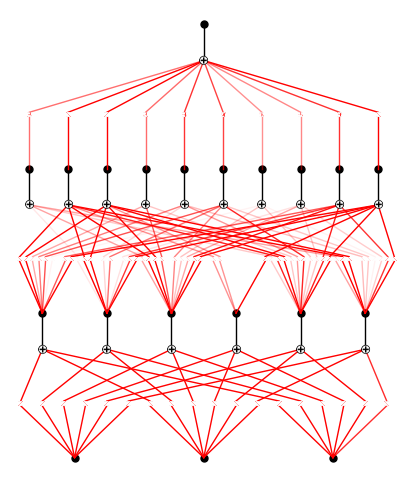

In [5]:

model.plot()

In [6]:
model.fit(dataset, opt="LBFGS", steps=100);

| train_loss: 2.98e-02 | test_loss: 4.07e-02 | reg: 0.00e+00 | : 100%|█| 100/100 [00:10<00:00,  9.58

saving model version 0.9


In [7]:
formula = model.symbolic_formula()[0][0]
print(ex_round(formula, 6))
ex_round(formula, 6)

-3.5e-5*x_1 + 0.006724*x_2 - 0.000829*x_3 + 0.041314


-3.5e-5*x_1 + 0.006724*x_2 - 0.000829*x_3 + 0.041314

In [ ]:
0.0065185404*x_1 - 0.0015733551*x_2 + 0.0023067647*x_3 - 0.0002042616*x_5 + 0.0093320001*x_6 - 0.0015581805*x_7 + 0.0099164573*x_8 + 0.001312092*(0.7166879818 - x_4)**2 + 0.0022884607*(0.7406031193 - x_4)**2 + 0.0009999082*(-0.819869655*x_4 - 1)**2 + 46.6913477541*(0.0039577492*x_1 - 0.0155221708*x_2 - 0.0036076508*x_3 + 0.0040898939*x_5 + 0.0018537795*x_6 - 0.0031114135*x_7 - 0.0028412879*x_8 + 0.2272191467 - exp(-0.2109505087*x_4))**2 + 0.5937337504*(0.0039577492*x_1 - 0.0155221708*x_2 - 0.0036076508*x_3 + 0.0040898939*x_5 + 0.0018537795*x_6 - 0.0031114135*x_7 - 0.0028412879*x_8 + 0.2272989253 - exp(-0.2109505087*x_4))**2 - 47.6681848878*(0.0039577492*x_1 - 0.0155221708*x_2 - 0.0036076508*x_3 + 0.0040898939*x_5 + 0.0018537795*x_6 - 0.0031114135*x_7 - 0.0028412879*x_8 + 0.2281913227 - exp(-0.2109505087*x_4))**2 + 0.4300457254*(0.0039577492*x_1 - 0.0155221708*x_2 - 0.0036076508*x_3 + 0.0040898939*x_5 + 0.0018537795*x_6 - 0.0031114135*x_7 - 0.0028412879*x_8 + 0.2307012479 - exp(-0.2109505087*x_4))**2 + 0.0285281814*exp(0.670906961*x_4) + 0.0060065173 - 2.12668e-5*exp(-2.2581598759*x_4) - 0.1950089176*exp(-0.2109505087*x_4)

In [22]:
ex_round(model, 3)

model_output = model(dataset['train_input'])
print(model_output.shape)
print('kan  MSE:', torch.mean((model_output - dataset['train_label'])**2))
print('TKEB MSE:', torch.mean((torch.from_numpy(np_label_1.astype(np.float32)).cpu()[:200] - torch.abs(dataset['train_label']))**2))
#print(torch.abs(model_output))

torch.Size([200, 1])
kan  MSE: tensor(0.0005, grad_fn=<MeanBackward0>)
TKEB MSE: tensor(0.0009)


[339.2024   20.49015  16.58442]


Text(0, 0.5, 'feature attribution score')

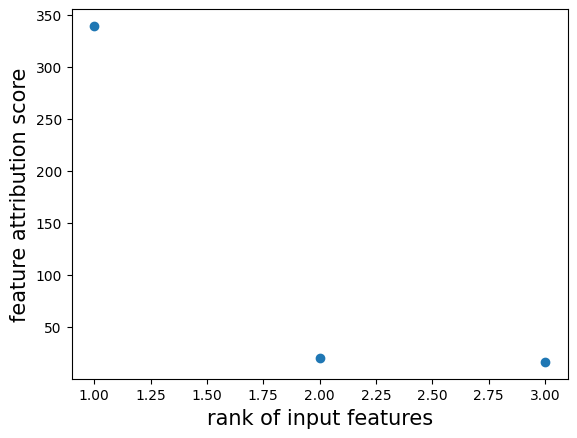

In [8]:
print(model.feature_score.cpu().detach().numpy())

plt.scatter(np.arange(3)+1, model.feature_score.cpu().detach().numpy())
plt.xlabel('rank of input features', fontsize=15)
plt.ylabel('feature attribution score', fontsize=15)

In [146]:
model_output = model(dataset['train_input'])
print(model_output)

tensor([[ 0.0010],
        [-0.0018],
        [ 0.0097],
        [ 0.0005],
        [-0.0071],
        [ 0.0014],
        [-0.0167],
        [-0.0006],
        [ 0.0202],
        [ 0.0119],
        [ 0.0043],
        [ 0.0081],
        [ 0.0189],
        [ 0.0216],
        [ 0.0187],
        [ 0.0080],
        [ 0.0143],
        [-0.0025],
        [ 0.0230],
        [ 0.0166],
        [ 0.0070],
        [-0.0019],
        [ 0.0109],
        [ 0.0096],
        [ 0.0200],
        [ 0.0046],
        [ 0.0011],
        [ 0.0265],
        [ 0.0086],
        [ 0.0133],
        [ 0.0186],
        [ 0.0006],
        [ 0.0368],
        [ 0.0049],
        [-0.0046],
        [ 0.0361],
        [ 0.0106],
        [ 0.0261],
        [ 0.0047],
        [ 0.0112],
        [ 0.0319],
        [ 0.0485],
        [ 0.0159],
        [ 0.0093],
        [ 0.0257],
        [ 0.0169],
        [ 0.0148],
        [ 0.0163],
        [ 0.0413],
        [ 0.0234],
        [ 0.0097],
        [ 0.0179],
        [ 0.

In [57]:
grids = [5,10,20,50]
#grids = [5]

train_rmse = []
test_rmse = []

for i in range(len(grids)):
    #model = KAN(width=[4,2,1,1], grid=grids[i], k=3, seed=0, device=device).initialize_from_another_model(model, dataset['train_input'])
    model = model.refine(grids[i])
    results = model.fit(datasemodel = model.refine(10)
    train_rmse.append(results['train_loss'][-1].item())
    test_rmse.append(results['test_loss'][-1].item())

saving model version 0.3


| train_loss: 1.31e+10 | test_loss: 1.44e+10 | reg: 5.44e+06 | : 100%|█| 50/50 [00:01<00:00, 47.79it


saving model version 0.4
saving model version 0.5


| train_loss: nan | test_loss: nan | reg: nan | : 100%|█████████████| 50/50 [00:01<00:00, 42.57it/s]


saving model version 0.6
saving model version 0.7


| train_loss: nan | test_loss: nan | reg: nan | : 100%|█████████████| 50/50 [00:01<00:00, 35.41it/s]


saving model version 0.8
saving model version 0.9


| train_loss: nan | test_loss: nan | reg: nan | : 100%|█████████████| 50/50 [00:02<00:00, 21.24it/s]


saving model version 0.10
